[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jykr/beige/blob/main/beige_tutorial.ipynb)

If you encounter the error "ImportError: cannot import name '_png' from 'matplotlib' (/usr/local/lib/python3.7/dist-packages/matplotlib/___init__.py)", restarting runtime will resolve the issue.

In [26]:
! pip install beret-beige==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: beret-beige
    Found existing installation: beret-beige 0.0.5
    Uninstalling beret-beige-0.0.5:
      Successfully uninstalled beret-beige-0.0.5


In [4]:
! beige

INFO  @ Wed, 21 Sep 2022 07:50:37:
	 generated new fontManager 

usage: beige [-h] [--fit-pi] [--rep-pi] [--perfect-edit]
             [--guide_activity_column GUIDE_ACTIVITY_COLUMN]
             [--pi-prior-weight PI_PRIOR_WEIGHT] [--prefix PREFIX]
             [--sorting_bin_upper_quantile_column SORTING_BIN_UPPER_QUANTILE_COLUMN]
             [--sorting_bin_lower_quantile_column SORTING_BIN_LOWER_QUANTILE_COLUMN]
             [--cuda] [--sample-mask-column SAMPLE_MASK_COLUMN]
             bdata_path
beige: error: the following arguments are required: bdata_path


## Format data to feed into the model

In [ ]:
! gdown 18Azb8YmmMvFZo9urc2TxZr540xXWOv_v

Downloading...
From: https://drive.google.com/uc?id=18Azb8YmmMvFZo9urc2TxZr540xXWOv_v
To: /content/beret_count_072121_ABE_topbot_LDLvar.h5ad
100% 40.2M/40.2M [00:00<00:00, 186MB/s]


In [13]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import beret as be


In [8]:
bdata= be.read_h5ad("beret_count_072121_ABE_topbot_LDLvar.h5ad")

In [18]:
bdata.condit["rep"], bdata.condit["sort"] = zip(*bdata.condit.index.map(lambda s: s.rsplit("_", 1)))

Input the upper and lower sorting quantile of each sorting bins:

In [22]:
bdata.condit['upper_quantile'] = 1.0
bdata.condit.loc[bdata.condit.sort == "bot", "upper_quantile"] = 0.3
bdata.condit['lower_quantile'] = 0.0
bdata.condit.loc[bdata.condit.sort == "top", "lower_quantile"] = 0.7

In [23]:
bdata.write("beret_count.h5ad")

Now we're ready to run the model!

## Scenario 1. CRISPR screen data **without** reporter data

If you don't have reporter information measured, you can take one of three options for analysis:
1. `--fit-pi` : Editing rate is fitted so that overall likelihood of the model is maximized.
2. `--perfect-edit` : Assuming editing rate is 1 for all guides. This option is recommended over 1) based on the inference accuracy in simulation data.
3. `--guide_activity_column=your_col_name` : If you want to use external information about guide activity estimated using other software, input the guide activity in the Screen.guides DataFrame (see `Screen` object in [perturb-tools](https://github.com/pinellolab/perturb-tools)).Pass the column name as the argument.(under development)

In [28]:
%%shell
beige beret_count.h5ad --prefix=perf_edit --perfect-edit

INFO  @ Wed, 21 Sep 2022 08:22:05:
	 generated new fontManager 

Done loading data. Preprocessing...
Linear fit of log(a0) ~ log(q): [b0, b1]=[-1.35738604  0.89983998], cov=[[ 0.00286364 -0.00058358]
 [-0.00058358  0.00012305]]
Running inference for model A...
  0% 0/2000 [00:00<?, ?it/s]loss 57768.849842300726 @ iter 0
  5% 100/2000 [00:01<00:36, 52.44it/s]loss 56241.330520649295 @ iter 100
 10% 196/2000 [00:03<00:33, 53.75it/s]loss 55299.01943926985 @ iter 200
 15% 298/2000 [00:05<00:32, 52.70it/s]loss 54662.11686373059 @ iter 300
 20% 400/2000 [00:07<00:30, 53.15it/s]loss 54222.57767572075 @ iter 400
 25% 496/2000 [00:09<00:28, 52.59it/s]loss 54008.02751491477 @ iter 500
 30% 598/2000 [00:11<00:27, 51.46it/s]loss 53917.58015525791 @ iter 600
 35% 700/2000 [00:13<00:24, 52.33it/s]loss 53853.48229570638 @ iter 700
 40% 796/2000 [00:15<00:22, 52.76it/s]loss 53807.70074745731 @ iter 800
 45% 898/2000 [00:17<00:20, 53.46it/s]loss 53828.863369921644 @ iter 900
 50% 1000/2000 [00:19<00:19,

## Scenario 2. CRISPR screen data **with** reporter data

In [31]:
%%shell
beige beret_count.h5ad --prefix=mixture #[--rep-pi]

INFO  @ Wed, 21 Sep 2022 08:25:43:
	 generated new fontManager 

Done loading data. Preprocessing...
Linear fit of log(a0) ~ log(q): [b0, b1]=[-1.35738604  0.89983998], cov=[[ 0.00286364 -0.00058358]
 [-0.00058358  0.00012305]]
Running inference for model B...
  0% 0/2000 [00:00<?, ?it/s]loss 255667.66722958046 @ iter 0
  5% 100/2000 [00:02<00:56, 33.48it/s]loss 110682.05714203106 @ iter 100
 10% 199/2000 [00:06<00:54, 32.98it/s]loss 73354.12146017441 @ iter 200
 15% 299/2000 [00:09<00:50, 33.79it/s]loss 63976.051619360216 @ iter 300
 20% 399/2000 [00:12<00:58, 27.46it/s]loss 59963.095599660024 @ iter 400
 25% 500/2000 [00:17<01:40, 14.86it/s]loss 57681.92181810699 @ iter 500
 30% 597/2000 [00:21<00:48, 28.80it/s]loss 56316.10032960888 @ iter 600
 35% 699/2000 [00:25<01:16, 17.04it/s]loss 55358.39977158179 @ iter 700
 40% 799/2000 [00:29<00:35, 34.25it/s]loss 54745.119015610835 @ iter 800
 45% 899/2000 [00:31<00:30, 35.80it/s]loss 54334.498362539365 @ iter 900
 50% 999/2000 [00:34<00:2

Result is saved in `prefix/{file_name}.model{model_class}.result.pkl`. 

In [19]:
with open("perf_edit/beret_count.modelA.result.pkl", "rb") as f:
  res = pkl.load(f)

Text(0, 0.5, 'loss')

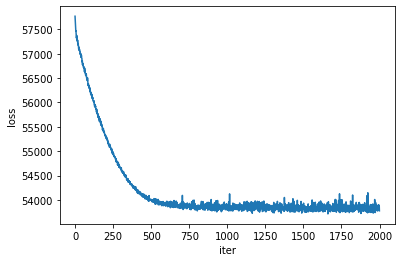

In [5]:
plt.plot(res['loss'])
plt.xlabel("iter")
plt.ylabel("loss")

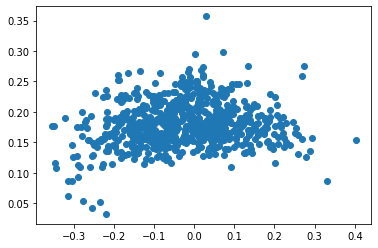

In [6]:
plt.scatter(res['mu'], res['mu_sd'])

Order of the paramters is the same as `bdata.guides[target_col].unique()`.

In [26]:
bdata.guides[["target", "Group2"]].drop_duplicates().iloc[np.where(abs(res['z_score']) > 2)[0],:]

,target,Group2
name,,
CONTROL_12_g1,CONTROL_12,NegCtrl
CONTROL_5_g1,CONTROL_5,NegCtrl
LDLR_SA_1_g1,LDLR_SA_1,PosCtrl_dec
LDLR_SA_2_g1,LDLR_SA_2,PosCtrl_dec
LDLR_SA_4_g1,LDLR_SA_4,PosCtrl_dec
LDLR_SA_5_g1,LDLR_SA_5,PosCtrl_dec
LDLR_SA_6_g1,LDLR_SA_6,PosCtrl_dec
LDLR_SA_8_g1,LDLR_SA_8,PosCtrl_dec
LDLR_SD_12_g1,LDLR_SD_12,PosCtrl_dec
